In [1]:
import cf_xarray
import xarray as xr
import numpy as np

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [3]:
ds = xr.open_dataset('/Users/matthew/Downloads/mrms/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20250101-070000.grib2', engine='gribberish')
ds

ValueError: No valid GRIB messages found

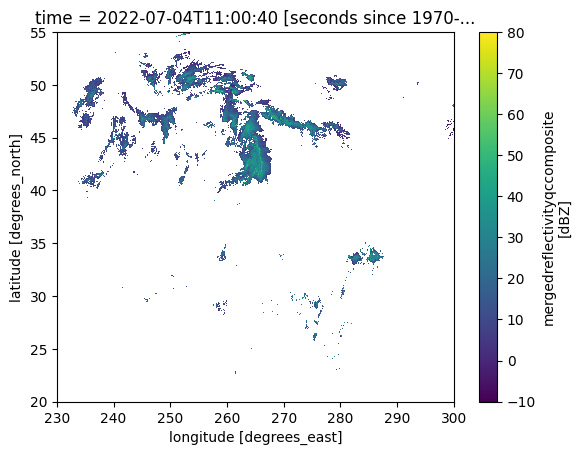

In [3]:
radar = ds['mergedreflectivityqccomposite']
radar = radar.where(radar > -10)
radar.plot(vmin=-10, vmax=80)

In [4]:
import ujson
from gribberish.kerchunk import scan_gribberish

out = scan_gribberish('/Users/matthew/Downloads/mrms/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20250101-060000.grib2', use_cfgrib_codec=True)
print(out)
with open('/Users/matthew/Downloads/mrms/dataset.json', 'w') as f:
    ujson.dump(out, f)

[]
